In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import os 
import textwrap
import requests

### `Step-1:` Creating Substitution Cipher

In [43]:
# one will act as the key, other as the value
letters1 = list(string.ascii_lowercase) #key
letters2 = list(string.ascii_lowercase) #values

In [44]:
# initializing an empty dictionary
true_mapping = {}

In [45]:
# shuffle second set of letters
random.shuffle(letters2)

In [46]:
# populate map
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

In [47]:
# true_mapping

### `Step-2:` Creating the Language Model

In [48]:
# # Downloading the file
# if not os.path.exists('moby_dick.txt'):
#     print('Downloading Moby dick...')
#     r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
#     with open('moby_dick.txt','w') as f:
#         f.write(r.content.decode())

In [49]:
# initialize Markov Matrix to store all the bigram probabilities
M = np.ones((26,26))
# also we need a vector to store the unigram probabilities
# initial state distribution
pi = np.zeros(26)
# print('Markov Matrix:', M)
# print(type(M))
# print('Initial State Distribution:', pi)
# print(len(pi))
# function to update the Markov Matrix
def update_transition(ch1,ch2):
#     i = (ord(ch1) + 97)%97
    i = ord(ch1) -97
    j = ord(ch2) -97
#     j = (ord(ch2) + 97)%97
    M[i,j] += 1

# function to update the initial state distribution
def update_pi(ch):
#     i = (ord(ch) + 97)%97
    i = ord(ch) -97
    pi[i] += 1
    
# get the log-probability of a token/word
def get_word_prob(word):
#     i = (ord(word[0])+97)%97
    i = ord(word[0]) -97
    logp = np.log(pi[i])
    
    for ch in word[1:]:
#         j = (ord(ch) + 97)%97
        j = ord(ch) -97
        logp += np.log(M[i,j]) #update prob
        i = j # update j
    return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
    # if input is a string, split into an array of tokens
    if type(words) == str:
        words = words.split()
    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp

### `Step-3:` Training the Language Model 

In [50]:
# Creating a markov model based on an english dataset
# DATA PRE-PROCESSING
import re

# Set the file path to your actual file
file_path = 'moby_dick.txt'

# Compile a regex to remove non-alphabetic characters
regex = re.compile('[^a-zA-Z]')

# Load in words
with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        line = line.rstrip()
        # There are blank lines in the file
        if line:
            # Remove non-alphabetic characters using the regex
            line = regex.sub(' ', line)
            
            # Split the tokens in the line and lowercase
            tokens = line.lower().split()
            
            for token in tokens:
                # Update the model
                # First letter
                ch0 = token[0]
                update_pi(ch0)
                
                # Other letters
                for ch1 in token[1:]:
                    update_transition(ch0, ch1)
                    ch0 = ch1

# Normalize the probabilities
pi /= pi.sum()
print("Initial State Distribution:", pi)
M /= M.sum(axis=1, keepdims=True)
print('Markov Matrix:', M)


Initial State Distribution: [1.09454034e-01 5.20069678e-02 3.89842666e-02 2.71213123e-02
 1.82485492e-02 3.85045319e-02 1.63296103e-02 6.39397863e-02
 6.72094345e-02 3.90774189e-03 4.42939516e-03 2.83136627e-02
 3.90727613e-02 2.23239653e-02 6.49737776e-02 2.81599612e-02
 3.33485482e-03 1.80063530e-02 9.26074280e-02 1.64227627e-01
 1.23054280e-02 7.33574908e-03 6.73817664e-02 2.32880923e-05
 1.16393885e-02 1.58359028e-04]
Markov Matrix: [[7.04046861e-05 2.76127179e-02 3.36111972e-02 4.38621195e-02
  4.22428117e-04 8.73018108e-03 2.05018446e-02 1.08704835e-02
  4.75090822e-02 2.95699682e-04 1.45456082e-02 1.10633924e-01
  2.53034442e-02 2.09721479e-01 2.11214058e-04 2.34306795e-02
  7.04046861e-05 1.08395055e-01 9.77076234e-02 1.42217466e-01
  7.92756766e-03 2.33602749e-02 1.04198935e-02 4.50589991e-04
  2.94854826e-02 2.63313526e-03]
 [6.00292826e-02 2.66089503e-02 6.36577758e-05 5.72919982e-04
  2.54949392e-01 6.36577758e-05 1.27315552e-04 4.45604431e-04
  3.79400344e-02 5.47456872e-0

In [51]:
original_message =''' 
A Lion lay asleep in the forest, his great head resting on his paws. A timid little Mouse came upon him unexpectedly, and in her fright and haste to get away, ran across the Lion's nose. Roused from his nap, the Lion laid his huge paw angrily on the tiny creature to kill her.

"Spare me!" begged the poor Mouse. "Please let me go and some day I will surely repay you."

The Lion was much amused to think that a Mouse could ever help him. But he was generous and finally let the Mouse go.

Some days later, while stalking his prey in the forest, the Lion was caught in the toils of a hunter's net. Unable to free himself, he filled the forest with his angry roaring. The Mouse knew the voice and quickly found the Lion struggling in the net. Running to one of the great ropes that bound him, she gnawed it until it parted, and soon the Lion was free.

"You laughed when I said I would repay you," said the Mouse. "Now you see that even a Mouse can help a Lion."''' 

In [52]:
# a function to encode a message
def encode_message(msg):
    #downcase
    msg = msg.lower()
    
    # replace non-alpha characters
    msg = regex.sub(' ',msg)
    
    # make the encoded message
    coded_msg = []
    for ch in msg:
        coded_ch = ch
        if ch in true_mapping: 
            coded_ch = true_mapping[ch]
        coded_msg.append(coded_ch)
    return ''.join(coded_msg)
encoded_message = encode_message(original_message)

# a function to decode a message
def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)
    return ''.join(decoded_msg)

In [53]:
# run an evolutionary algorithm to decode the message

# initialization point
dna_pool = []
for _ in range(20):
    dna = list(string.ascii_lowercase)
    random.shuffle(dna)
    dna_pool.append(dna)
# print('DNA-POOL',dna_pool)

In [54]:
def evolve_offspring(dna_pool, n_children):
    # make n_children per offspring
    offspring = []
    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))
            
            # switch
            tmp = copy[j]
            copy[j] = copy[k]
            copy[k] = tmp
            offspring.append(copy)
    return offspring + dna_pool

In [55]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
    if i>0:
        # get offspring from the current dna pool
        dna_pool = evolve_offspring(dna_pool,3)
        
        # calculate core for each dna
        dna2score ={}
        for dna in dna_pool:
            current_map = {}
            for k, v in zip(letters1,dna):
                current_map[k] = v
            
            decoded_message = decode_message(encoded_message, current_map)
            score = get_sequence_prob(decoded_message)
            
            #store it
            # needs to be a strin to be a dict key
            dna2score[''.join(dna)] = score
            
            # record te best so far
            if score > best_score:
                best_dna = dna
                best_map = current_map
                best_score = score
            # avg score 
        scores[i] = np.mean(list(dna2score.values()))
            # keep 5 best dna
            # also turn tem back into list of sinle chars
        sorted_dna = sorted(dna2score.items(), key =lambda x:x[1],reverse = True)
        dna_pool = [list(k) for k, v in sorted_dna[:5]]
            
        if i % 200 == 0:
            print('iter:',i,'score:',scores[i],'best so far:',best_score)
# print('sorted_dna: \n', sorted_dna)
# print('\n dna_pool: \n', dna_pool)

iter: 200 score: -2384.7154417256197 best so far: -2278.384820604799
iter: 400 score: -2428.65115548584 best so far: -2277.492148626059
iter: 600 score: -2381.4784881375717 best so far: -2277.492148626059
iter: 800 score: -2404.938349016952 best so far: -2277.492148626059


In [56]:
print(best_map)

{'a': 'k', 'b': 'n', 'c': 't', 'd': 'h', 'e': 'x', 'f': 'f', 'g': 'c', 'h': 'u', 'i': 'p', 'j': 'i', 'k': 'o', 'l': 'q', 'm': 'v', 'n': 'a', 'o': 'j', 'p': 'd', 'q': 'r', 'r': 'w', 's': 'm', 't': 'y', 'u': 'z', 'v': 'g', 'w': 'l', 'x': 'b', 'y': 'e', 'z': 's'}


In [57]:
# use best score
decoded_message = decode_message(encoded_message, best_map)
print('LL of decoded message:',get_sequence_prob(decoded_message))
print('LL of True message:',get_sequence_prob(regex.sub(' ',original_message.lower())))

# which letters are wrong
for true, v in true_mapping.items():  
    pred = best_map[v]
    if true != pred:
        print('true: %s, pred: %s'%(true,pred))

LL of decoded message: -2277.492148626059
LL of True message: -1738.1324983445868
true: a, pred: s
true: b, pred: j
true: c, pred: l
true: e, pred: r
true: f, pred: b
true: g, pred: f
true: h, pred: a
true: i, pred: n
true: j, pred: z
true: l, pred: o
true: m, pred: g
true: n, pred: e
true: o, pred: t
true: p, pred: m
true: r, pred: u
true: s, pred: i
true: t, pred: c
true: u, pred: h
true: v, pred: y
true: y, pred: p
true: z, pred: v


In [58]:
generated_txt = textwrap.fill(decoded_message)
print('True message:\n', textwrap.fill(original_message))
print('\n Encoded Message:\n',encoded_message)
print('\n Decoded message:\n',textwrap.fill(decoded_message))

True message:
   A Lion lay asleep in the forest, his great head resting on his paws.
A timid little Mouse came upon him unexpectedly, and in her fright and
haste to get away, ran across the Lion's nose. Roused from his nap,
the Lion laid his huge paw angrily on the tiny creature to kill her.
"Spare me!" begged the poor Mouse. "Please let me go and some day I
will surely repay you."  The Lion was much amused to think that a
Mouse could ever help him. But he was generous and finally let the
Mouse go.  Some days later, while stalking his prey in the forest, the
Lion was caught in the toils of a hunter's net. Unable to free
himself, he filled the forest with his angry roaring. The Mouse knew
the voice and quickly found the Lion struggling in the net. Running to
one of the great ropes that bound him, she gnawed it until it parted,
and soon the Lion was free.  "You laughed when I said I would repay
you," said the Mouse. "Now you see that even a Mouse can help a Lion."

 Encoded Message:
   

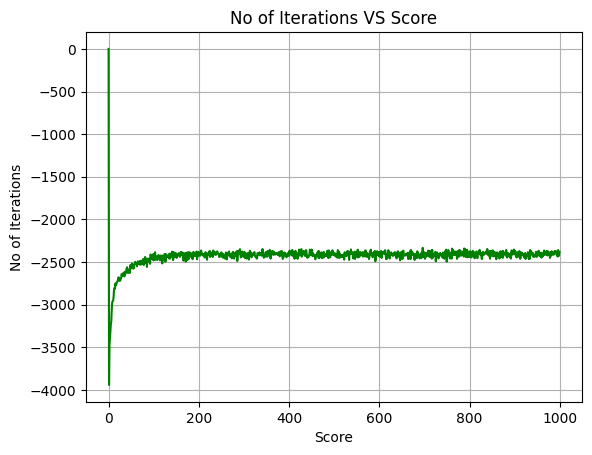

In [59]:
plt.plot(scores,'g')
plt.xlabel('Score') 
plt.ylabel('No of Iterations') 
plt.title('No of Iterations VS Score')
plt.grid()
plt.show()

In [60]:
from nltk.translate.bleu_score import sentence_bleu
score = sentence_bleu([original_message], generated_txt)
print(score)

0.15852046236931072
